In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
%matplotlib inline

# settings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading data
features=pd.read_csv("/content/drive/MyDrive/walmart/features.csv")
stores=pd.read_csv("/content/drive/MyDrive/walmart/stores.csv")
train=pd.read_csv("/content/drive/MyDrive/walmart/train.csv")
test=pd.read_csv("/content/drive/MyDrive/walmart/test.csv")

In [ ]:
df_names=['features','stores','train','test']
df_list=[features,stores,train,test]
for i in range(4):
    print('--'*15)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*15)
    display(df_list[i].head(5))

------------------------------
Dataframe features has 8190 rows and 12 columns.
------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


------------------------------
Dataframe stores has 45 rows and 3 columns.
------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


------------------------------
Dataframe train has 421570 rows and 5 columns.
------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


------------------------------
Dataframe test has 115064 rows and 4 columns.
------------------------------


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
for i in [0,2,3]:
    print(f'Dataframe {df_names[i]} contains data from {df_list[i].Date.min()} to {df_list[i].Date.max()}.\n')

Dataframe features contains data from 2010-02-05 to 2013-07-26.

Dataframe train contains data from 2010-02-05 to 2012-10-26.

Dataframe test contains data from 2012-11-02 to 2013-07-26.



In [ ]:
# checking missing values
for i in range(4):
    print(f'Dataframe {df_names[i]} has missing values.\n') if (df_list[i].isna().sum().any()==True) else print(f'Dataframe {df_names[i]} does not have missing values.')

Dataframe features has missing values.

Dataframe stores does not have missing values.
Dataframe train does not have missing values.
Dataframe test does not have missing values.


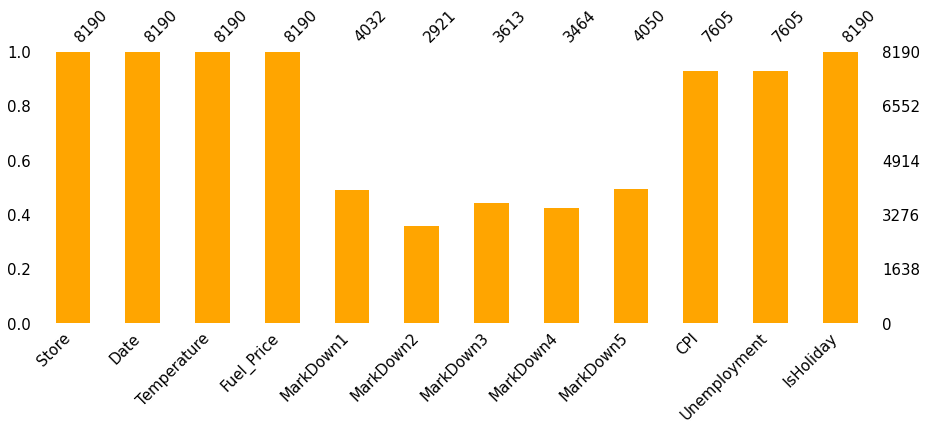

In [ ]:
import missingno as msno
msno.bar(features,figsize=(15, 5),fontsize=15,color='orange');

In [ ]:
print('Percentages of missing values in features dataframe.')
(100*features.isna().sum()/features.shape[0]).sort_values()


Percentages of missing values in features dataframe.


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
CPI              7.142857
Unemployment     7.142857
MarkDown5       50.549451
MarkDown1       50.769231
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown2       64.334554
dtype: float64

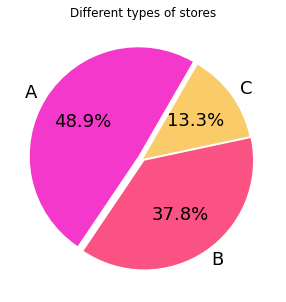

In [ ]:
# pie chart
labels = stores.Type.value_counts().index.tolist()
sizes = stores.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60,
        textprops={'fontsize': 18},colors=['#f538cc','#fa5282','#facc69'])
plt.title('Different types of stores');

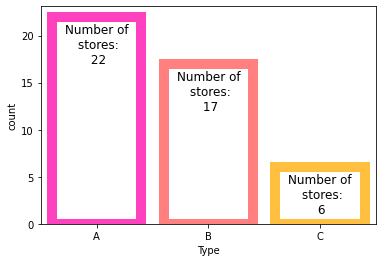

In [ ]:
ax = sns.countplot(stores.Type ,facecolor=(0,0,0,0),linewidth=10,
                   edgecolor=sns.color_palette("spring", 3))
for p in ax.patches:
    ax.annotate(f'Number of\n stores:\n {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-4),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=12);

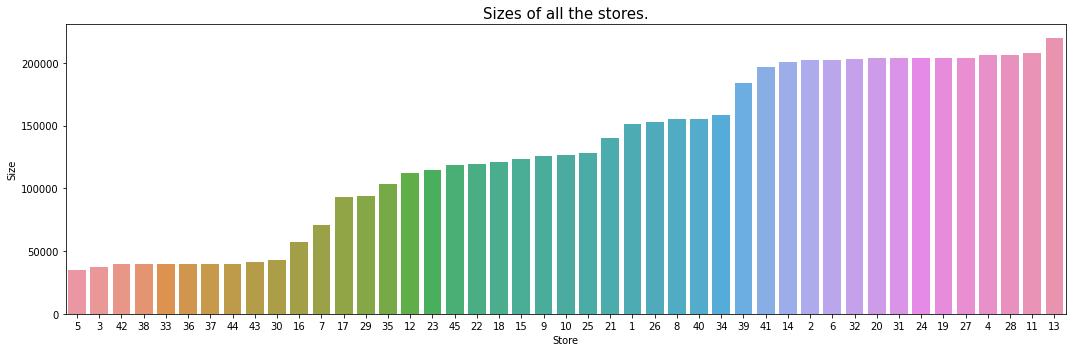

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

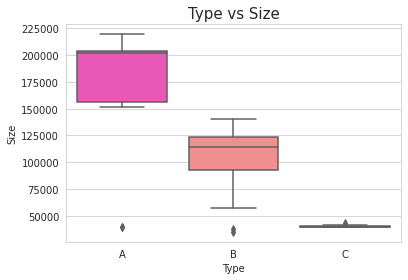

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=stores,palette='spring')
plt.title('Type vs Size',fontsize=15);

In [ ]:
# combining train/test and stores and features dataframes for further analysis

train_expanded = train.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
train_expanded = train_expanded.merge(stores, how='inner', on=['Store'])

test_expanded = test.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
test_expanded = test_expanded.merge(stores, how='inner', on=['Store'])

# converting dtype of date column
train_expanded['Date'] = pd.to_datetime(train_expanded['Date'])
test_expanded['Date'] = pd.to_datetime(test_expanded['Date'])

In [ ]:
train_expanded.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


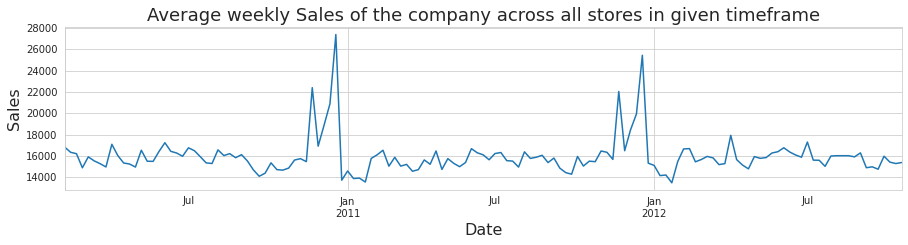

In [ ]:
plt.figure(figsize=(15,3))
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

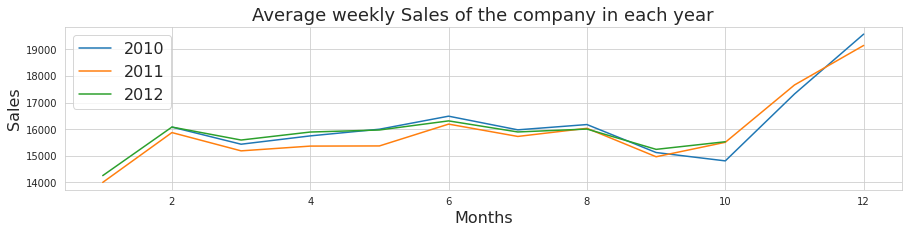

In [ ]:
# creating 3 new features from date column

for df in [train_expanded,test_expanded]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

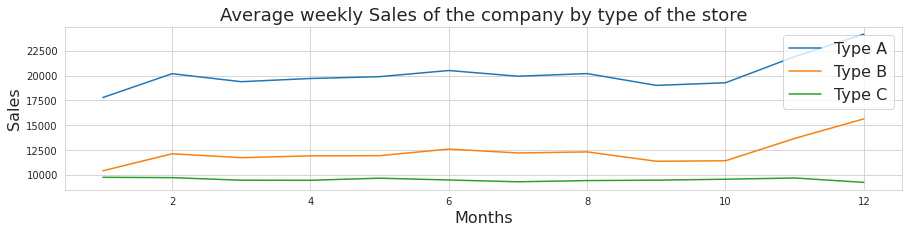

In [ ]:
plt.figure(figsize=(15,3))
train_expanded[train_expanded['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company by type of the store', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

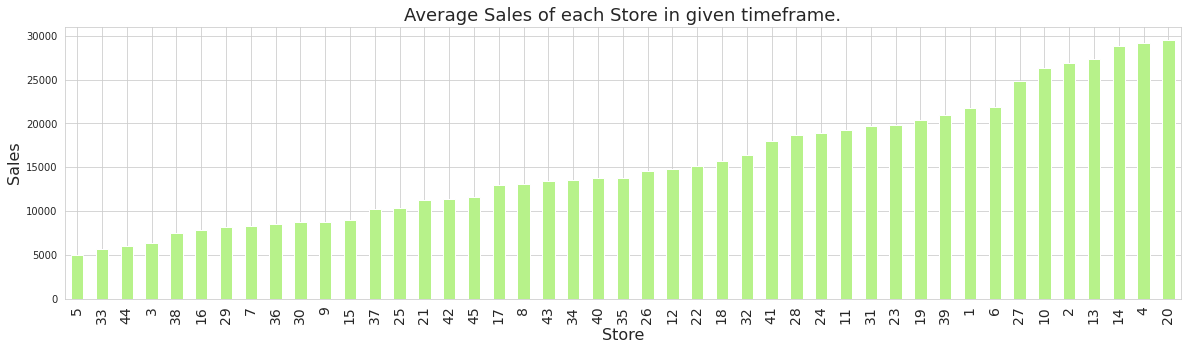

In [ ]:
def av_sales_plotter(str):
    plt.figure(figsize=(20,5))
    train_expanded.groupby(str).mean()['Weekly_Sales'].sort_values().plot(kind='bar',color='#b7f28a')
    plt.title(f'Average Sales of each {str} in given timeframe.', fontsize=18)
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(str, fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    
av_sales_plotter('Store')

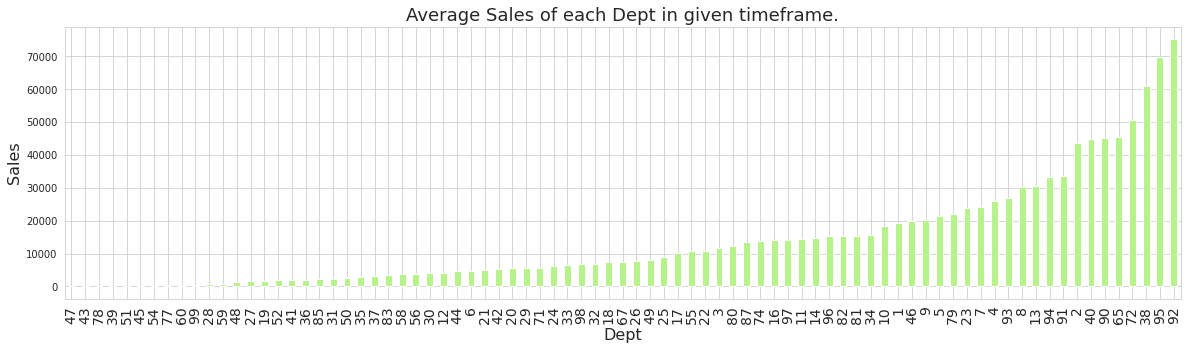

In [ ]:
av_sales_plotter('Dept')

IsHoliday vs Weekly_Sales


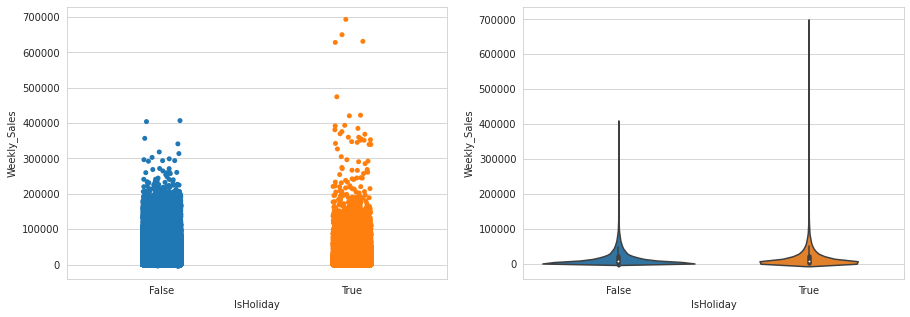

In [ ]:
print('IsHoliday vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_expanded['Weekly_Sales'],x=train_expanded['IsHoliday'])
plt.subplot(1,2,2)
sns.violinplot(y=train_expanded['Weekly_Sales'],x=train_expanded['IsHoliday']);

Type vs Weekly_Sales


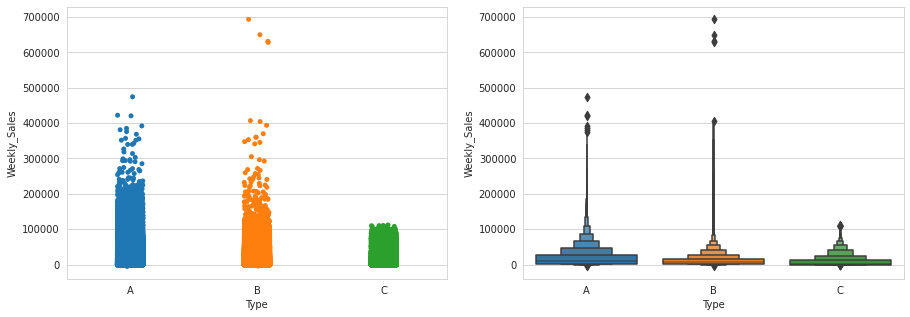

In [ ]:
print('Type vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_expanded['Weekly_Sales'],x=train_expanded['Type'])
plt.subplot(1,2,2)
sns.boxenplot(y=train_expanded['Weekly_Sales'],x=train_expanded['Type']);

Weekly sales vs size


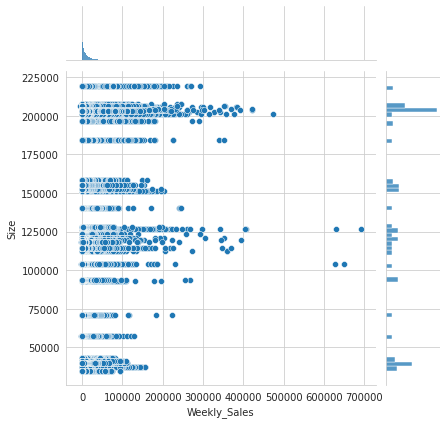

In [ ]:
print('Weekly sales vs size')
sns.jointplot(train_expanded['Weekly_Sales'],train_expanded['Size']);

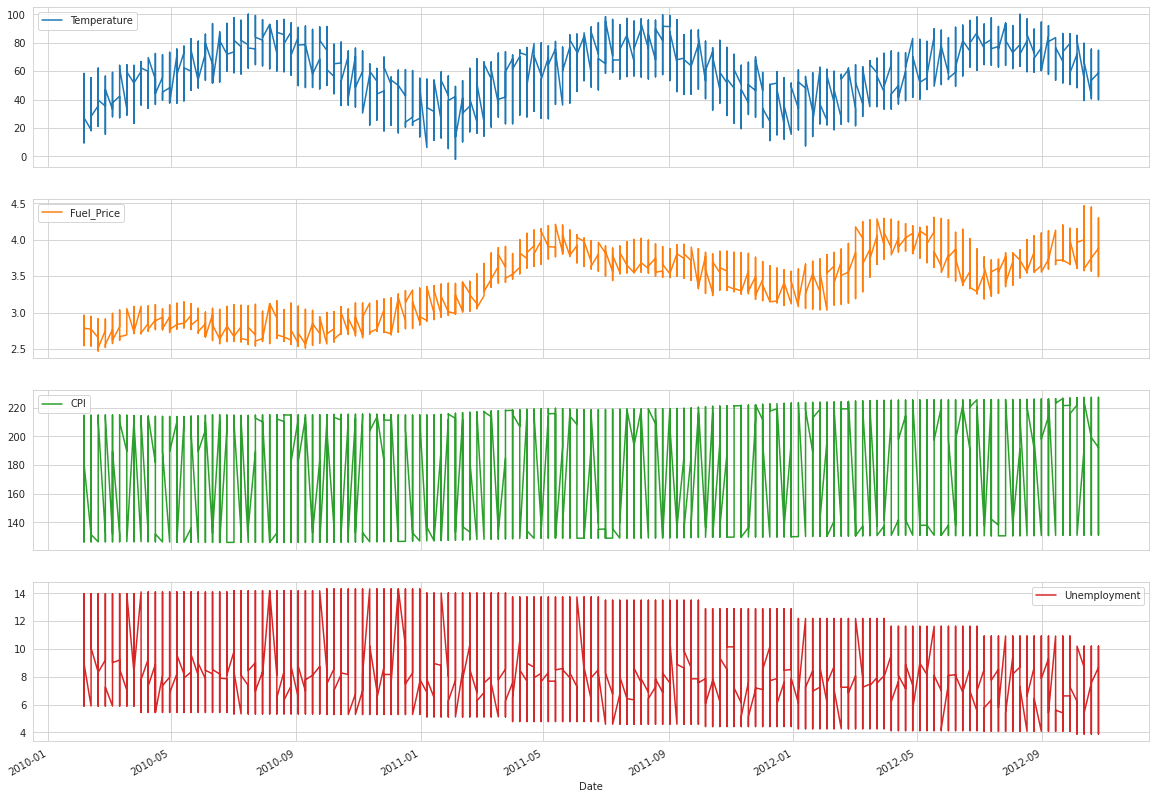

In [ ]:
train_expanded[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15));

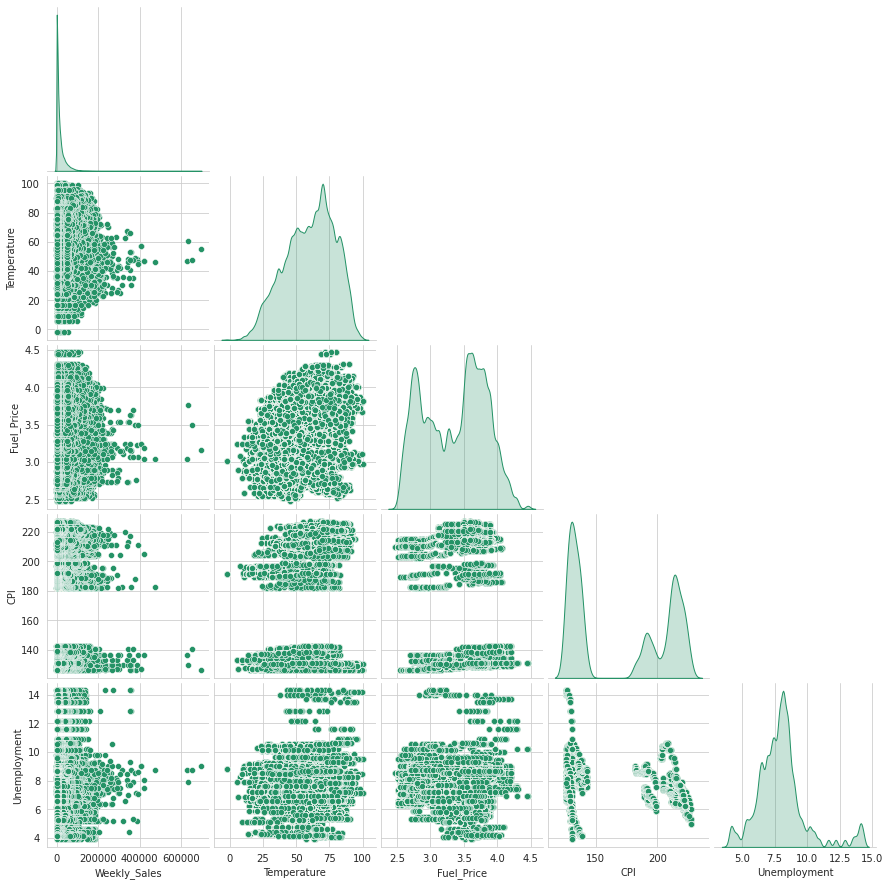

In [ ]:
sns.set_palette("summer")
sns.pairplot(train_expanded[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],
             corner=True,diag_kind="kde");

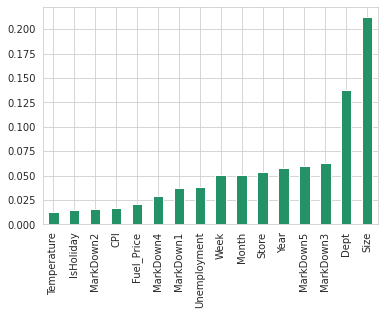

In [ ]:
train_expanded.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

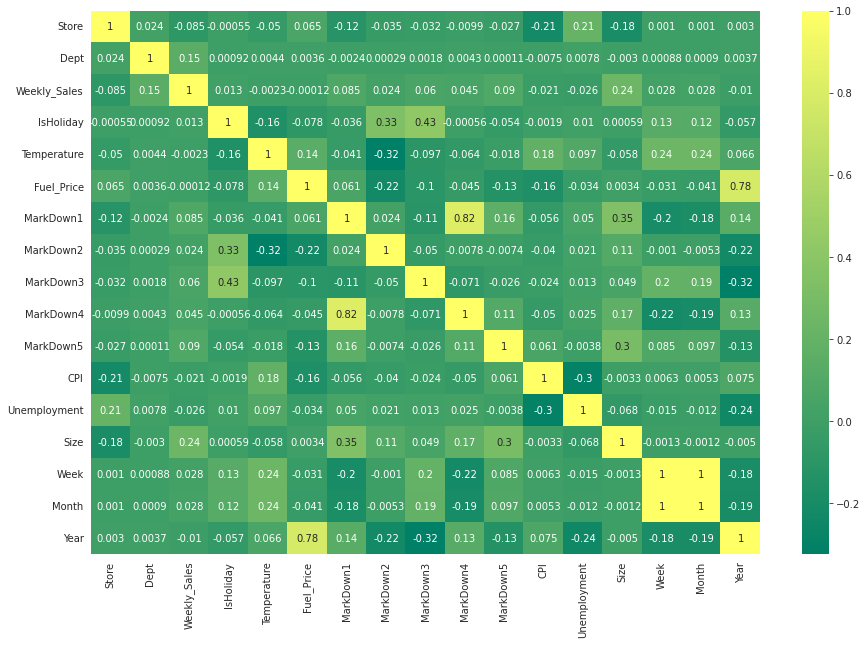

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_expanded.corr(),annot=True,cmap='summer');

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
# preprocessing

def preprocessor(df):
    # label-encoding
    df['IsHoliday'] = df['IsHoliday'].astype('str').map({'True':0,'False':1})
    df.Type = df.Type.map({'A':2,'B':1,'C':0})
    # deleting less important features
    return df.drop(['Date','Year','MarkDown1','MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI',
             'Unemployment','Temperature','Fuel_Price'],axis=1)

train_preprocessed = preprocessor(train_expanded)
test_preprocessed = preprocessor(test_expanded)

In [ ]:
# splitting data into 2 parts

y = train_preprocessed["Weekly_Sales"]
X = train_preprocessed.drop(['Weekly_Sales'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# function for displaying scores

def score_calc(predictions):
    scores = pd.DataFrame([mean_absolute_error(y_test, predictions)
#                           ,mean_squared_error(y_test, predictions)
                          ,r2_score(y_test, predictions)],columns=['score'],index=['MAE','R2 score'])
    return scores

# function for building model

def run_model(model,name):
    
    name = model()
    name.fit(X_train, y_train)
    preds = name.predict(X_test)
    try:
        feat_imp = name.feature_importances_
        plt.bar(X_train.columns,feat_imp,color='green')
        plt.title('Feature Importance graph')
        plt.xticks(rotation=45)
    except:
        pass
    return score_calc(preds)

In [ ]:
train_preprocessed.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Month
0,1,1,24924.50,1,2,151315,5,2
1,1,1,46039.49,0,2,151315,6,2
2,1,1,41595.55,1,2,151315,7,2
3,1,1,19403.54,1,2,151315,8,2
4,1,1,21827.90,1,2,151315,9,3


,score
MAE,1974.741640
R2 score,0.953069


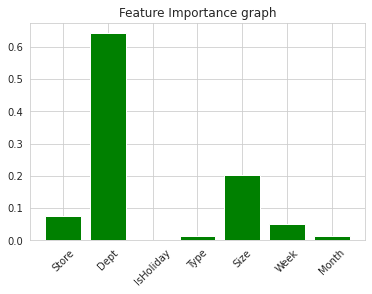

In [ ]:
run_model(DecisionTreeRegressor,'dtree')

,score
MAE,1760.498307
R2 score,0.968771


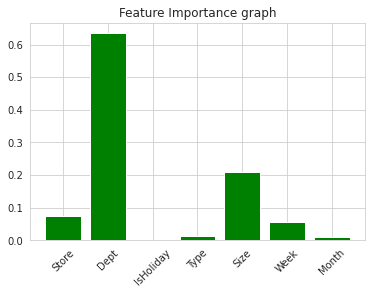

In [ ]:
run_model(RandomForestRegressor,'rfc')

[18:58:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,score
MAE,7040.429843
R2 score,0.734944


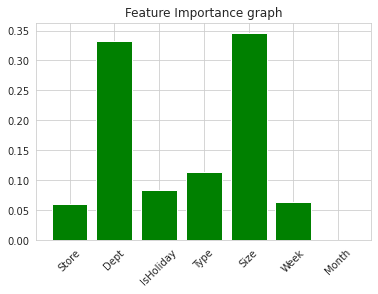

In [ ]:
run_model(XGBRegressor,'xgb')

In [ ]:
run_model(KNeighborsRegressor,'knn')

,score
MAE,5836.120170
R2 score,0.758062


In [ ]:
# scaling size column
scaler=StandardScaler()
scaler.fit(train_preprocessed['Size'].values.reshape(-1,1))
X_train['Size'] = scaler.transform(X_train['Size'].values.reshape(-1, 1))
X_test['Size'] = scaler.transform(X_test['Size'].values.reshape(-1, 1))

,score
MAE,1972.406783
R2 score,0.953717


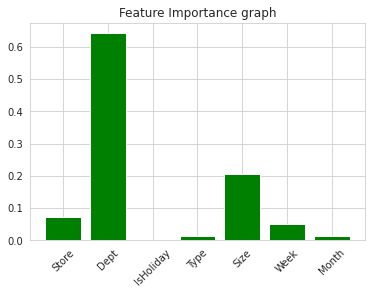

In [ ]:
run_model(DecisionTreeRegressor,'dtree')

In [ ]:
X_train = X_train[['Store','Dept','Size']]
X_test = X_test[['Store','Dept','Size']]

,score
MAE,2661.648621
R2 score,0.905231


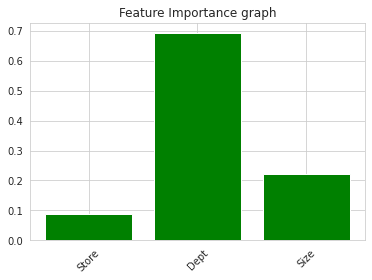

In [ ]:
run_model(DecisionTreeRegressor,'dtree')

In [ ]:
# option A
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv=4)
print(f"Average 4-Fold CV Score: {score.mean().round(4)}")

Average 4-Fold CV Score: 0.6929


In [ ]:
random_grid = {'n_estimators': [50,60,70],
               'max_features': [3,4],
               'max_depth': [25,30,35],
               'min_samples_split': [3,4],
              'min_samples_leaf':[1,2]}

rf_grid = RandomizedSearchCV(RandomForestRegressor(),
                        random_grid,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
0.7821521670870483
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 30}


In [ ]:
predictor_train_scale = train_preprocessed.drop('Weekly_Sales',axis=1)
predictor_test_scale = test_preprocessed
target_train = train_preprocessed.Weekly_Sales

kf=KFold(n_splits=4,shuffle=True)

preds_3   = list()
y_pred_3  = []
r2_score_ = []
mae=[]

# Applying model on each fold and calculating mean of score
for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    r2 = r2_score(y_val,rf.predict(X_val))
    mae_ = mean_absolute_error(y_val,rf.predict(X_val))
    r2_score_.append(r2)
    mae.append(mae_)
    preds_3.append(rf.predict(predictor_test_scale[predictor_test_scale.columns]))
    
y_pred_final_3 = np.mean(preds_3,axis=0)    

print('R2 - CV Score: {}'.format((sum(r2_score_)/4)),'\n')
print('MAE Score: {}'.format((sum(mae)/4)),'\n')
print("Score : ",r2_score_)


Fold: 1


Fold: 2


Fold: 3


Fold: 4

R2 - CV Score: 0.9668868101755291 

MAE Score: 1772.618480016607 

Score :  [0.9691615776943947, 0.968854243196629, 0.9604304872714092, 0.9691009325396839]


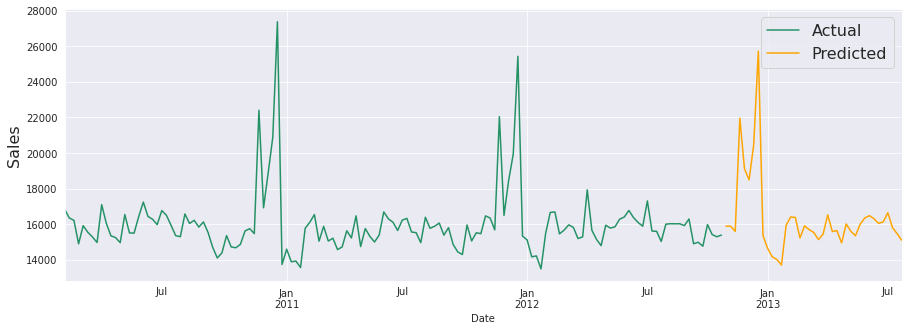

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
test_expanded['Weekly_Sales'] = y_pred_final_3
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
test_expanded.groupby('Date')['Weekly_Sales'].mean().plot(color='orange')
plt.legend(['Actual', 'Predicted'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16);